# Ejercicio de Regresión Lineal

En este notebook intentaremos predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning segun algunas de sus características

## Predicción: ¿Cuántas veces será compartido un artículo del Blog?

Vamos a comenzar por Importar y Visualizar los datos

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#cargamos los datos de entrada
data = pd.read_csv("../datasets/articulos_ml.csv")

In [25]:
# obtener una muestra aleatoria 
data.sample(10)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
38,CometML wants to do for machine learning what ...,NaN,458,3,0.0,3,19,757
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
42,"What's the difference between data science, ma...",http://varianceexplained.org/r/ds-ml-ai/,1763,1,29.0,1,105,2300
150,[Log] 77: Following Artificial Intelligence Br...,[Log] 77: http://feedproxy.google.com/~r/Techc...,2513,7,3.0,4,78,55914
89,[Log] 16: Story roundup: data to be grateful f...,[Log] 16: https://mxpnlcms.wpengine.com/blog/2...,2457,3,3.0,4,17,0
152,[Log] 79: Facebook Updates Progress on Artific...,[Log] 79: http://www.adweek.com/socialtimes/ar...,912,5,14.0,6,80,1824
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
88,[Log] 15: Story roundup: data to be grateful f...,[Log] 15: https://mixpanel.com/blog/2017/11/22...,1858,8,5.0,2,16,25548
134,[Log] 61: Facebook’s Artificial Intelligence R...,[Log] 61: http://feedproxy.google.com/~r/Techc...,2282,1,1.0,3,62,54198
114,[Log] 41: 10 Machine Learning Examples in Java...,[Log] 41: http://tutorialzine.com/2017/04/10-m...,3480,1,14.0,3,42,20880


In [4]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

Vemos que algunos campos (por ejemplo en comentarios) tienen valores nulos.

En nuestro caso la columna Shares será nuestra salida, es decir nuestro valor "Y", el valor que queremos predecir

In [6]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


De aqui observamos que por ejemplo la media de Cantidad de palabras es 1808

Hay un artíclo mínimo con 250 palabras y el máximo contiene 8401.

Y en cuanto a las salidas, vemos mínimo de 0 veces compartido y máximo de 350000 (eso es mucho!)

## Visualización General

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8376\3496384728.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url', 'Elapsed days'],1).hist()


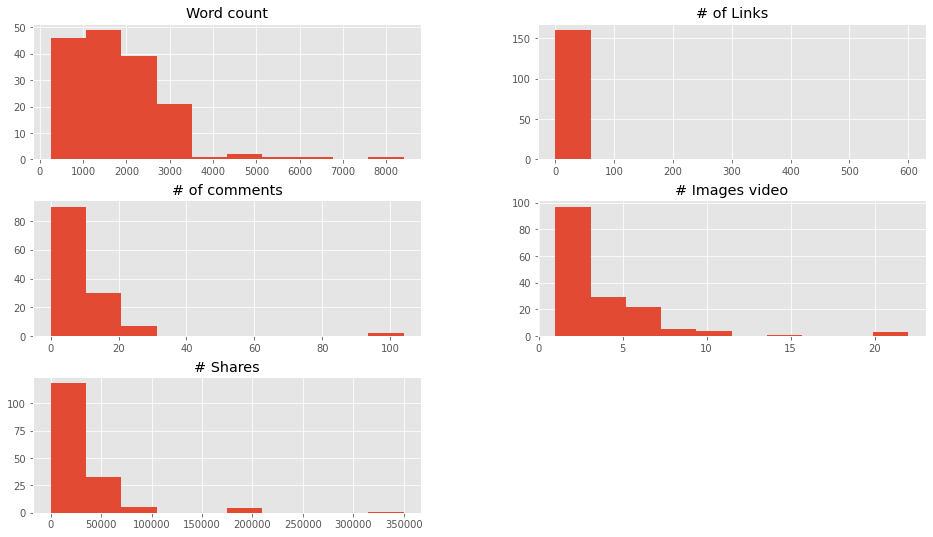

In [7]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

## Visualizamos Cantidad de Palabras vs. Compartidos

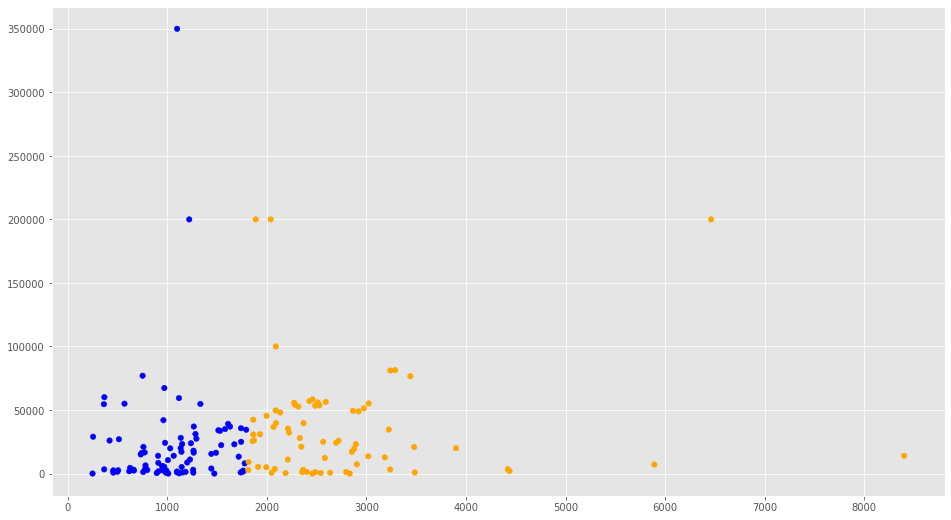

In [8]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

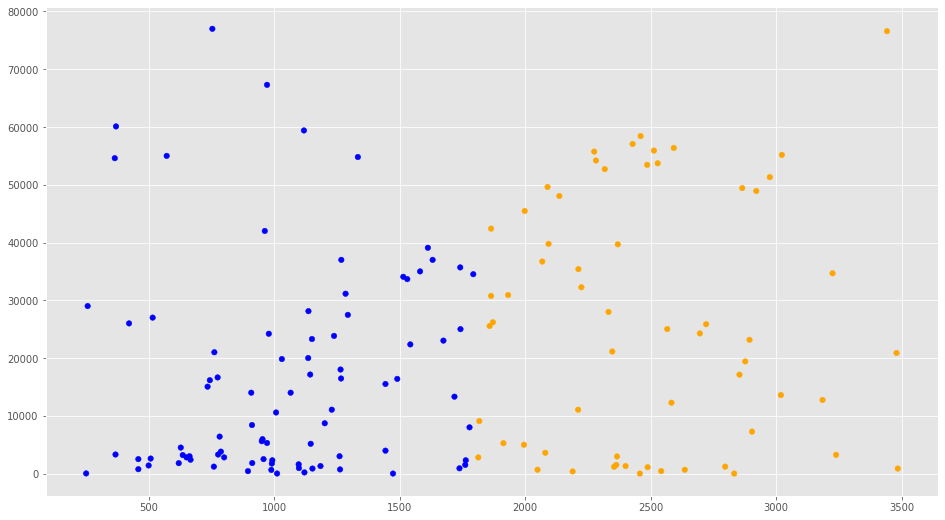

In [9]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [10]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [11]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [26]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# A continuación, se imprime el error cuadrático medio (MSE) y el puntaje de varianza (R2 score). 
# El error cuadrático medio es una medida de cuán alejadas están las predicciones del modelo de las 
# etiquetas reales en promedio, mientras que el puntaje de varianza indica cuánta de la variabilidad 
# en los datos se puede explicar por el modelo. El puntaje de varianza oscila entre 0 y 1, siendo 1 el mejor puntaje posible.

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


## Visualizamos la Recta que obtuvimos

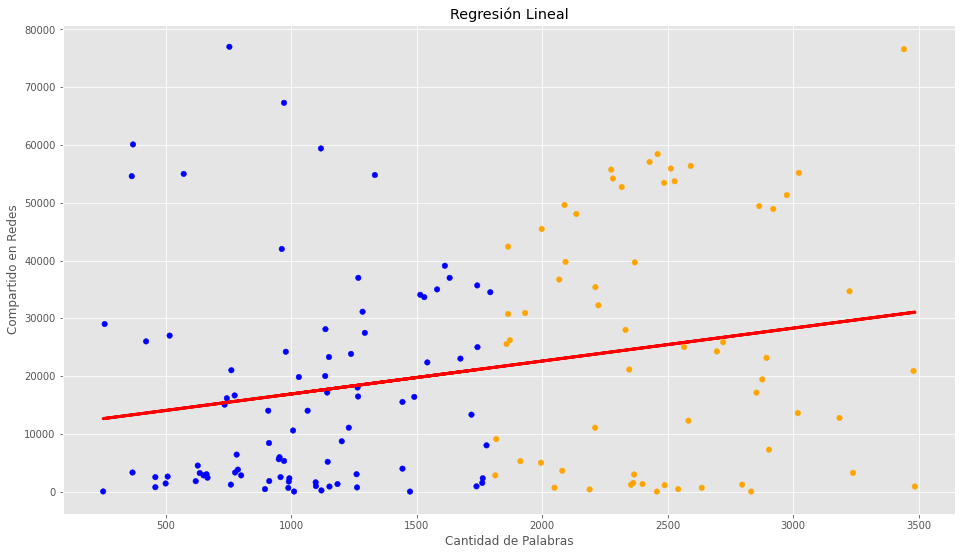

In [13]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [14]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


In [15]:
print('Coeficiente de determinación R',regr.score(X_train,y_train))

Coeficiente de determinación R 0.05519842281951404


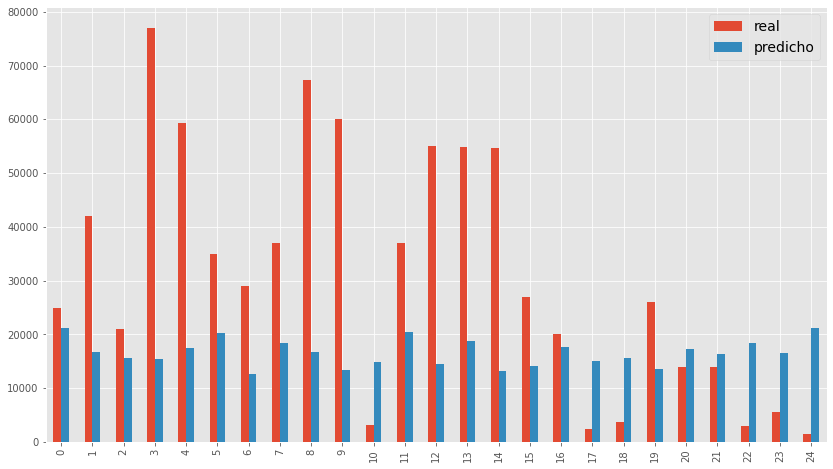

In [17]:
df = pd.DataFrame({'real':y_train,'predicho': y_pred})
df1 = df.head(25)#seleccionamos los 25 primeros valores
df1.plot(kind='bar',figsize=(14,8))
plt.legend(loc=1, prop={'size':14})
plt.show()

Evidentemente No es tan sencillo...

Vamos a mejorar un poco el modelo

# Regresión Lineal Múltiples (múltiples variables)

In [18]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values
XY_train

array([[1.742e+03, 1.800e+01],
       [9.620e+02, 7.000e+00],
       [7.610e+02, 1.000e+00],
       [7.530e+02, 4.000e+00],
       [1.118e+03, 3.000e+00],
       [1.581e+03, 6.000e+00],
       [2.560e+02, 2.800e+01],
       [1.267e+03, 6.000e+00],
       [9.710e+02, 1.100e+01],
       [3.690e+02, 7.000e+00],
       [6.350e+02, 6.000e+00],
       [1.631e+03, 2.100e+01],
       [5.710e+02, 5.000e+00],
       [1.333e+03, 1.200e+01],
       [3.640e+02, 7.000e+00],
       [5.150e+02, 7.000e+00],
       [1.135e+03, 9.000e+00],
       [6.660e+02, 7.000e+00],
       [7.870e+02, 5.000e+00],
       [4.210e+02, 3.000e+00],
       [1.065e+03, 2.100e+01],
       [9.080e+02, 3.000e+00],
       [1.260e+03, 1.100e+01],
       [9.500e+02, 7.000e+00],
       [1.761e+03, 6.300e+01],
       [9.110e+02, 3.400e+01],
       [9.710e+02, 7.000e+00],
       [4.580e+02, 3.000e+00],
       [4.580e+02, 6.000e+00],
       [7.820e+02, 1.400e+01],
       [2.080e+03, 8.000e+00],
       [2.500e+02, 7.000e+00],
       [

Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [19]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


In [20]:
print('Coeficiente de determinación R',regr2.score(XY_train,z_train))
#print('Coeficiente de determinación R:  %.2f' % regr2.score(XY_train,z_train))

Coeficiente de determinación R 0.107813760282097


### Predicción 2

In [23]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


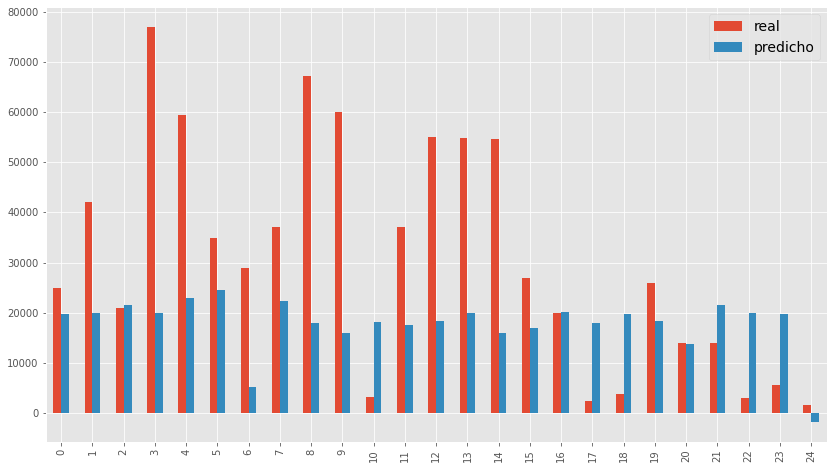

In [22]:
df = pd.DataFrame({'real':z_train,'predicho': z_pred})
df1 = df.head(25)#seleccionamos los 25 primeros valores
df1.plot(kind='bar',figsize=(14,8))
plt.legend(loc=1, prop={'size':14})
plt.show()

# Mejorar las predicciones y notas finales

En este ejemplo utilizamos información de artículos sobre Machine Learning con algunos datos ficticios 
en nuestro .csv pero si quisieramos tratar de mejorar
las predicciones, deberiamos utilizar más de 2 variables (recordemos que aqui lo hicimos para poder
graficar en 3D).
Sería conveniente además conseguir mejores características de entrada, pues no es lo mismo un enlace
de un portal con multitud de visitas al mes, que otros Blogs más modestos.

## OVERVIEW
La regresión lineal es un método estadístico utilizado para modelar la relación entre una variable dependiente y una o más variables independientes. Las partes principales de la regresión lineal incluyen los siguientes elementos:

+ Coeficientes de regresión: Estos son los valores que indican la relación entre las variables independientes y la variable dependiente. Los coeficientes se calculan utilizando la técnica de mínimos cuadrados y se pueden interpretar como la pendiente de la línea de regresión.

+ Intercepto: Este es el valor de la variable dependiente cuando todas las variables independientes son iguales a cero. Se representa por la letra "b" en la ecuación de la línea de regresión (y = mx + b).

+ Error estándar: Este es el valor que indica cuánto varía la variable dependiente en promedio en relación con la línea de regresión. Se utiliza para calcular los intervalos de confianza y la significancia estadística de los coeficientes de regresión.

+ Coeficiente de determinación (R²): Este es un valor que indica la proporción de la variación de la variable dependiente que puede explicarse por las variables independientes. Se encuentra en el rango de 0 a 1, donde 0 significa que no hay relación entre las variables y 1 significa que todas las variaciones de la variable dependiente se explican por las variables independientes.

+ Error cuadrático medio (MSE): Este es el promedio de los errores al cuadrado entre los valores observados y los valores predichos por el modelo. Es una medida de la calidad del ajuste de la línea de regresión a los datos y se utiliza para comparar diferentes modelos.

# EJERCICIO . Regresión Lineal Múltiples (múltiples variables)

In [ ]:
#seleccion de columnas
desired_columns = ["Word count", "# of Links", "# of comments", "# Images video","Elapsed days","# Shares"]
data2 = data[desired_columns]
data2["# of comments"] = data2["# of comments"].fillna(data["# of comments"].mean())

#data5["age"].fillna(data["age"].mean())

data2.describe()

In [ ]:
#Regresión lineal todas las columnas del dataset
X= data2[list(data2.columns)[:-1]]#se excluye la columna 'quality'
Y= data2['# Shares']
#dividir conjunto train/test
x_train,x_test,y_train,y_test = train_test_split(X ,Y , train_size=0.8, random_state =0)

In [ ]:
#entrenar el modelo
regressor=LinearRegression()


In [ ]:
#coeficientes que muestran modelo de regresión definida
data2 = pd.DataFrame(...,columns=['Coeficiente'])
data2

In [ ]:
#predicciones sobre conjunto prueba
y_pred = 

In [ ]:
#Obtener el RMSE

In [ ]:
#Obtener el MAE

In [ ]:
#Obtener el coeficiente de determinación R'

In [ ]:
# Creamos un grafico de barras que muestre los resultados predichos